In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load the Dataset

In [2]:
df = pd.read_csv ('/content/drive/My Drive/DATASET UAS ML/RegresiUTSTelkom.csv')
df.head()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


## Dataset Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 91 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2001        19999 non-null  int64  
 1   49.94357    19999 non-null  float64
 2   21.47114    19999 non-null  float64
 3   73.0775     19999 non-null  float64
 4   8.74861     19999 non-null  float64
 5   -17.40628   19999 non-null  float64
 6   -13.09905   19999 non-null  float64
 7   -25.01202   19999 non-null  float64
 8   -12.23257   19999 non-null  float64
 9   7.83089     19999 non-null  float64
 10  -2.46783    19999 non-null  float64
 11  3.32136     19999 non-null  float64
 12  -2.31521    19999 non-null  float64
 13  10.20556    19999 non-null  float64
 14  611.10913   19999 non-null  float64
 15  951.0896    19999 non-null  float64
 16  698.11428   19999 non-null  float64
 17  408.98485   19999 non-null  float64
 18  383.70912   19999 non-null  float64
 19  326.51512   19999 non-nul

Value counts for target column '2001':
2001
2007    1559
2005    1422
2008    1421
2006    1396
2004    1308
        ... 
1933       1
1935       1
1943       1
1942       1
1926       1
Name: count, Length: 68, dtype: int64

Descriptive statistics for target column '2001':
count    19999.000000
mean      1998.377569
std         10.607561
min       1926.000000
25%       1994.000000
50%       2002.000000
75%       2006.000000
max       2010.000000
Name: 2001, dtype: float64


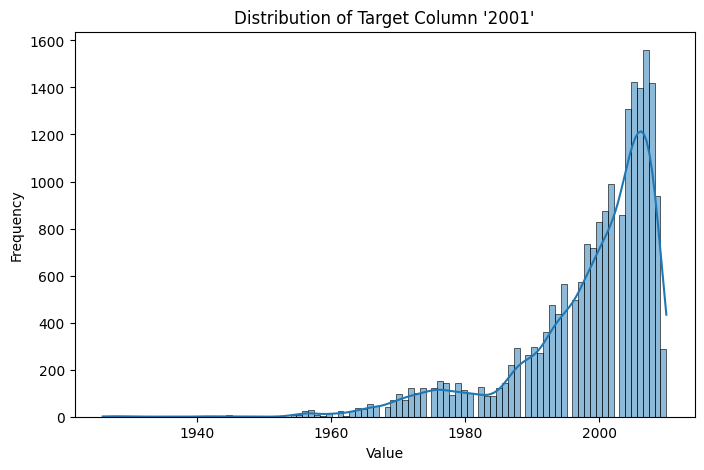

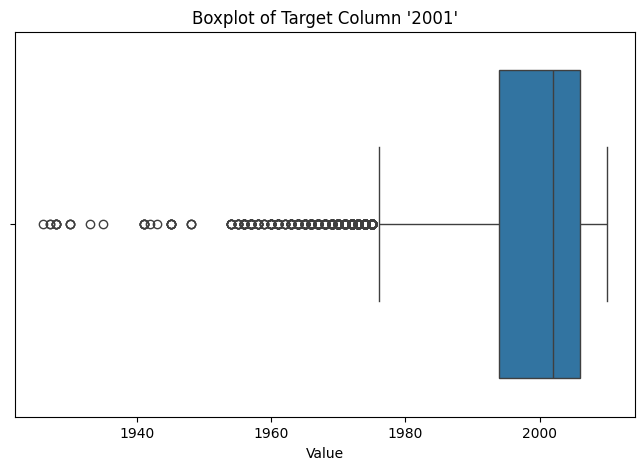

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tampilkan value counts
print("Value counts for target column '2001':")
print(df['2001'].value_counts())

# Tampilkan statistik deskriptif
print("\nDescriptive statistics for target column '2001':")
print(df['2001'].describe())

# Visualisasikan distribusi
plt.figure(figsize=(8, 5))
sns.histplot(df['2001'], kde=True)
plt.title("Distribution of Target Column '2001'")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Periksa apakah ada nilai yang sangat ekstrem atau outlier
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['2001'])
plt.title("Boxplot of Target Column '2001'")
plt.xlabel("Value")
plt.show()

## Feature Engineering

### Check for Null Value

In [5]:
df.isnull().sum()

,0
2001,0
49.94357,0
21.47114,0
73.0775,0
8.74861,0
...,...
-23.08793,0
68.40795,0
-1.82223,0
-27.46348,0


### Check for Duplicates

In [6]:
df.duplicated().sum()

np.int64(5)

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19994 entries, 0 to 19998
Data columns (total 91 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2001        19994 non-null  int64  
 1   49.94357    19994 non-null  float64
 2   21.47114    19994 non-null  float64
 3   73.0775     19994 non-null  float64
 4   8.74861     19994 non-null  float64
 5   -17.40628   19994 non-null  float64
 6   -13.09905   19994 non-null  float64
 7   -25.01202   19994 non-null  float64
 8   -12.23257   19994 non-null  float64
 9   7.83089     19994 non-null  float64
 10  -2.46783    19994 non-null  float64
 11  3.32136     19994 non-null  float64
 12  -2.31521    19994 non-null  float64
 13  10.20556    19994 non-null  float64
 14  611.10913   19994 non-null  float64
 15  951.0896    19994 non-null  float64
 16  698.11428   19994 non-null  float64
 17  408.98485   19994 non-null  float64
 18  383.70912   19994 non-null  float64
 19  326.51512   19994 non-null  fl

## Feature Selection

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

X = df.drop('2001', axis=1) # Features
y = df['2001'] # Target variable

y_transformed = np.log1p(y)

# Select all features that have a score greater than 0 from the f_regression test
selector_mi = SelectKBest(score_func=mutual_info_regression, k=70) # Anda bisa coba k lain
X_selected_new = selector_mi.fit_transform(X, y_transformed.values.ravel())

# Update X_selected for train_test_split
X_selected = pd.DataFrame(X_selected_new, columns=X.columns[selector_mi.get_support()])

## Modeling

### MLP using Tensorflow

In [10]:
!pip install tensorflow scikeras scikit-learn

In [11]:
# prompt: buatkan kode untuk model MLP menggunakan tensorflow. dengan menerapkan kombinasi teknik deep learning seperti dropout, batch normalization, penyesuaian learning rate (misalnya learning-rate scheduling atau warm restarts), modern optimizer, weight decay L1/L2, dan early stopping untuk meningkatkan kemampuan generalisasi. Gunakan Matriks Evaluasi (RMSE,MSE,RSquared) serta visualisasikan predicted dan actual value!

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import AdamW, Adam # Import Adam here
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_transformed, test_size=0.2, random_state=42)

# Scale fitur
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale variabel target (y_transformed yang sudah di-log)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

tf.keras.backend.clear_session()

# Define the MLP model
def build_model(input_dim):
    model = Sequential([
        Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001), input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1)
    ])
    return model

# Bangun model
model = build_model(X_train_scaled.shape[1])

# Kompilasi model
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse')

# Callbacks untuk model belum di-tuning
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.00001)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Train the model
history = model.fit(X_train_scaled, y_train_scaled,
                                    epochs=200,
                                    batch_size=64,
                                    validation_split=0.2,
                                    callbacks=[early_stopping, reduce_lr],
                                    verbose=1)

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 2.3025 - val_loss: 0.9704 - learning_rate: 5.0000e-04
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.3198 - val_loss: 0.9175 - learning_rate: 5.0000e-04
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.1453 - val_loss: 0.8639 - learning_rate: 5.0000e-04
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.0188 - val_loss: 0.8295 - learning_rate: 5.0000e-04
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.9427 - val_loss: 0.8076 - learning_rate: 5.0000e-04
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.8961 - val_loss: 0.7915 - learning_rate: 5.0000e-04
Epoch 7/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.8459 - val_loss: 0.7825 - learning_rate: 5.0000e-04
Epoch 8/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.8195 - val_loss: 0.7753 - learning_rate: 5.0000e-04
Epoch 9/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.8272 - va

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

--- Hasil Evaluasi Model ---
RMSE: 8.8368
MSE: 78.0884
R-squared: 0.3187


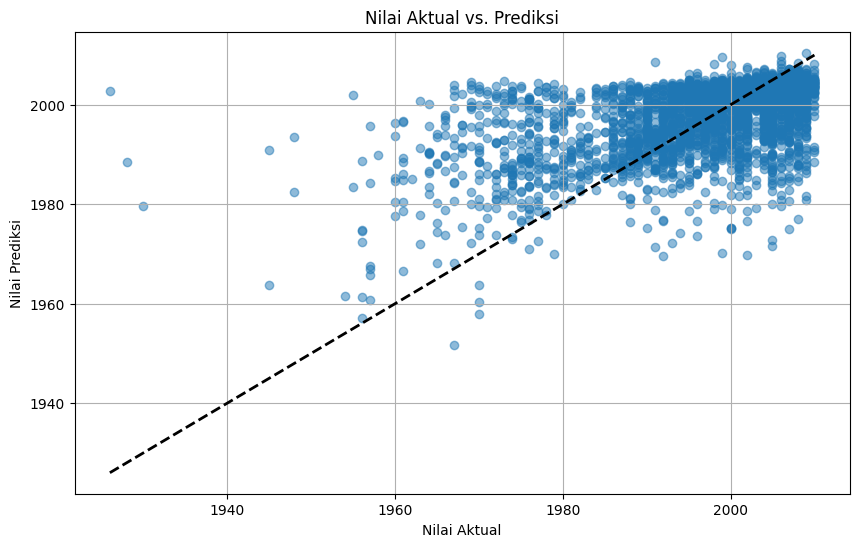

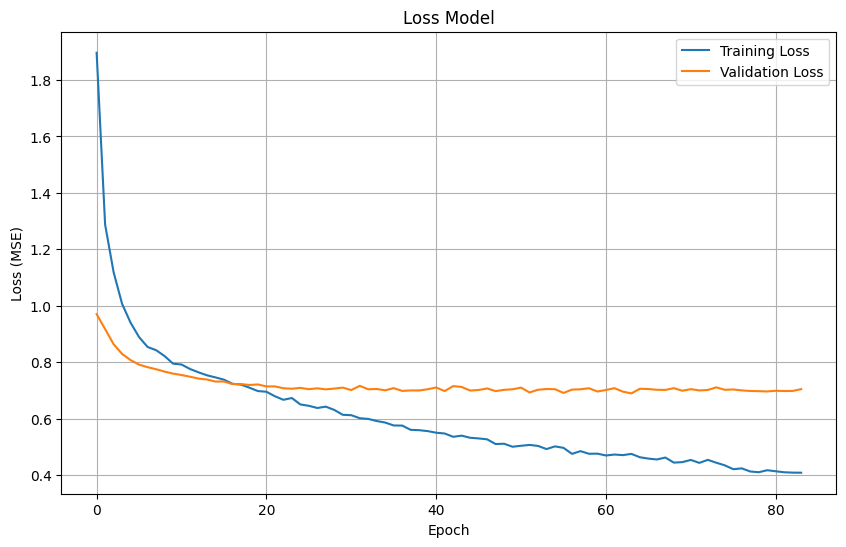

In [13]:
y_pred_scaled = model.predict(X_test_scaled).flatten()
y_pred = np.expm1(scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten())
y_test_original_scale = np.expm1(y_test)

rmse_ = np.sqrt(mean_squared_error(y_test_original_scale, y_pred))
mse_ = mean_squared_error(y_test_original_scale, y_pred)
r2_ = r2_score(y_test_original_scale, y_pred)

print(f"\n--- Hasil Evaluasi Model ---")
print(f"RMSE: {rmse_:.4f}")
print(f"MSE: {mse_:.4f}")
print(f"R-squared: {r2_:.4f}")

# Visualisasi Actual vs. Predicted Values ( Model)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original_scale, y_pred, alpha=0.5)
plt.plot([y_test_original_scale.min(), y_test_original_scale.max()],
         [y_test_original_scale.min(), y_test_original_scale.max()], 'k--', lw=2)
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Nilai Aktual vs. Prediksi")
plt.grid(True)
plt.show()

# Plot riwayat pelatihan (loss) model belum di-tuning
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


### MLP using PyTorch

In [14]:
!pip install torch torchvision torchaudio

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset

# Split data into training and testing sets
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X_selected, y_transformed, test_size=0.2, random_state=42)

# Scale features
scaler_X_torch = StandardScaler()
X_train_scaled_np = scaler_X_torch.fit_transform(X_train_np)
X_test_scaled_np = scaler_X_torch.transform(X_test_np)

# Scale target variable (y_transformed which was log-transformed)
scaler_y_torch = StandardScaler()
y_train_scaled_np = scaler_y_torch.fit_transform(y_train_np.values.reshape(-1, 1))
y_test_scaled_np = scaler_y_torch.transform(y_test_np.values.reshape(-1, 1))

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled_np, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled_np, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled_np, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled_np, dtype=torch.float32)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [16]:
# Define the MLP model using PyTorch
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3)
        )
        self.layer3 = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.2)
        )
        self.layer4 = nn.Sequential(
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Dropout(0.2)
        )
        self.output_layer = nn.Linear(32, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.output_layer(x)
        return x

# Instantiate the model
input_dim = X_train_scaled_np.shape[1]
model_torch = MLP(input_dim)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer_torch = optim.Adam(model_torch.parameters(), lr=0.0005, weight_decay=0.0001) # weight_decay is L2 regularization in Adam

In [17]:
# Training loop
epochs = 200
train_losses = []
val_losses = []
best_val_loss = float('inf')
patience = 20
patience_counter = 0

for epoch in range(epochs):
    model_torch.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer_torch.zero_grad()
        outputs = model_torch(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer_torch.step()
        running_loss += loss.item() * inputs.size(0)

    epoch_train_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_train_loss)

    # Validation
    model_torch.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader: # Using test_loader as validation in this case
            outputs = model_torch(inputs)
            loss = criterion(outputs, targets)
            running_val_loss += loss.item() * inputs.size(0)

    epoch_val_loss = running_val_loss / len(test_dataset)
    val_losses.append(epoch_val_loss)

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}')

    # Early Stopping
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        patience_counter = 0
        # Optionally save the best model state
        # torch.save(model_torch.state_dict(), 'best_model.pth')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered")
            break

Epoch 1/200, Train Loss: 1.0375, Val Loss: 0.8341
Epoch 2/200, Train Loss: 0.8527, Val Loss: 0.7850
Epoch 3/200, Train Loss: 0.7825, Val Loss: 0.7659
Epoch 4/200, Train Loss: 0.7477, Val Loss: 0.7599
Epoch 5/200, Train Loss: 0.7318, Val Loss: 0.7464
Epoch 6/200, Train Loss: 0.7075, Val Loss: 0.7364
Epoch 7/200, Train Loss: 0.7012, Val Loss: 0.7320
Epoch 8/200, Train Loss: 0.6931, Val Loss: 0.7236
Epoch 9/200, Train Loss: 0.6739, Val Loss: 0.7225
Epoch 10/200, Train Loss: 0.6625, Val Loss: 0.7170
Epoch 11/200, Train Loss: 0.6499, Val Loss: 0.7152
Epoch 12/200, Train Loss: 0.6402, Val Loss: 0.7119
Epoch 13/200, Train Loss: 0.6270, Val Loss: 0.7097
Epoch 14/200, Train Loss: 0.6191, Val Loss: 0.7012
Epoch 15/200, Train Loss: 0.6192, Val Loss: 0.7015
Epoch 16/200, Train Loss: 0.6040, Val Loss: 0.7102
Epoch 17/200, Train Loss: 0.5960, Val Loss: 0.7034
Epoch 18/200, Train Loss: 0.5858, Val Loss: 0.6946
Epoch 19/200, Train Loss: 0.5828, Val Loss: 0.6985
Epoch 20/200, Train Loss: 0.5788, Val Lo


--- Hasil Evaluasi Model PyTorch ---
RMSE: 8.6760
MSE: 75.2726
R-squared: 0.3433


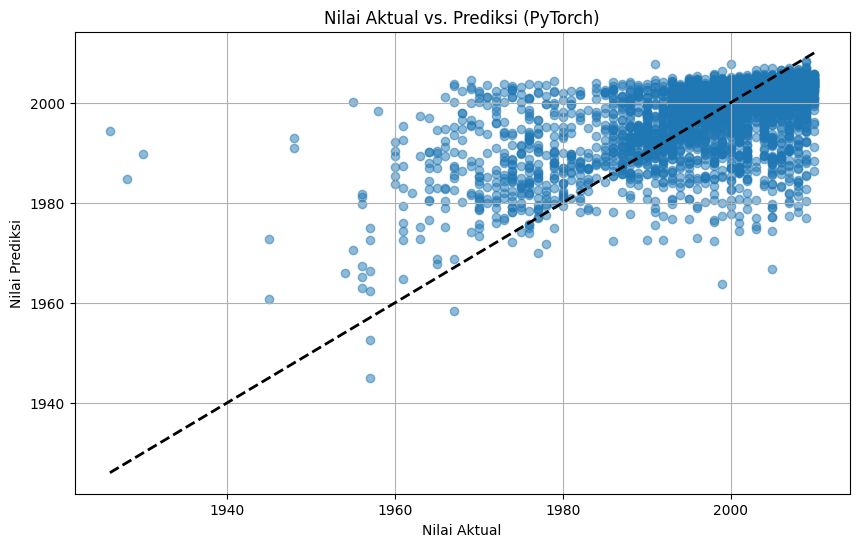

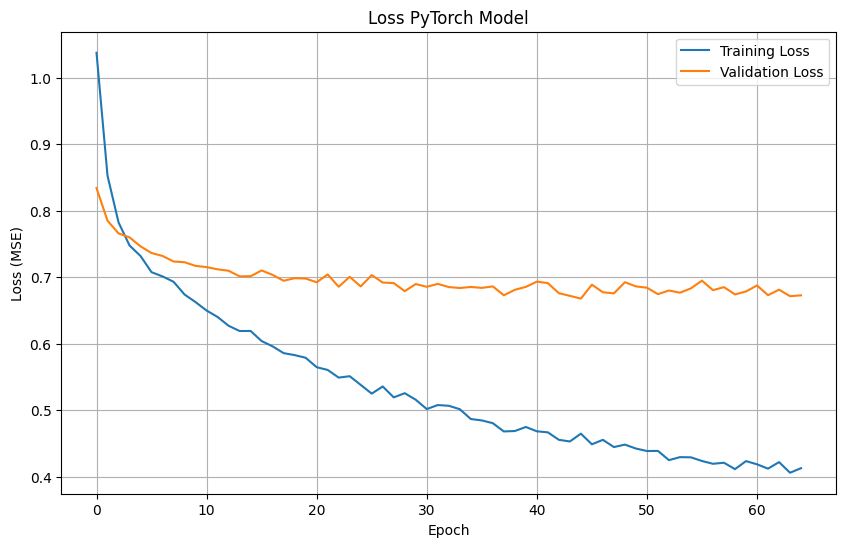

In [18]:
# Evaluation
model_torch.eval()
with torch.no_grad():
    y_pred_scaled_torch = model_torch(X_test_tensor).numpy().flatten()

# Inverse scale the predictions and the original test labels
y_pred_torch = np.expm1(scaler_y_torch.inverse_transform(y_pred_scaled_torch.reshape(-1, 1)).flatten())
y_test_original_scale_torch = np.expm1(y_test_np)

rmse_torch = np.sqrt(mean_squared_error(y_test_original_scale_torch, y_pred_torch))
mse_torch = mean_squared_error(y_test_original_scale_torch, y_pred_torch)
r2_torch = r2_score(y_test_original_scale_torch, y_pred_torch)

print(f"\n--- Hasil Evaluasi Model PyTorch ---")
print(f"RMSE: {rmse_torch:.4f}")
print(f"MSE: {mse_torch:.4f}")
print(f"R-squared: {r2_torch:.4f}")

# Visualisasi Actual vs. Predicted Values (PyTorch Model)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original_scale_torch, y_pred_torch, alpha=0.5)
plt.plot([y_test_original_scale_torch.min(), y_test_original_scale_torch.max()],
         [y_test_original_scale_torch.min(), y_test_original_scale_torch.max()], 'k--', lw=2)
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Nilai Aktual vs. Prediksi (PyTorch)")
plt.grid(True)
plt.show()

# Plot riwayat pelatihan (loss) PyTorch model
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss PyTorch Model')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


## Analisis

Model-model yang telah dilatih, yaitu MLP menggunakan TensorFlow dan MLP menggunakan PyTorch, dievaluasi menggunakan tiga metrik umum untuk regresi: RMSE, MSE, dan R-squared.

### Matrix Evaluasi

1.  **Mean Squared Error (MSE)**:
    *   **Definisi**: Rata-rata dari kuadrat perbedaan antara nilai aktual dan nilai prediksi.
    *   **Interpretasi**: MSE mengukur rata-rata kuadrat kesalahan. Nilai MSE yang lebih kecil menunjukkan bahwa model memiliki kesalahan prediksi yang lebih kecil. Karena kesalahan dikuadratkan, MSE memberikan bobot lebih besar pada kesalahan yang besar (outlier). Satuan MSE adalah kuadrat dari satuan target variabel.
    *   **Keunggulan**: Mudah dihitung, memberikan bobot lebih pada outlier.
    *   **Kelemahan**: Sensitif terhadap outlier, satuannya tidak sama dengan satuan target variabel, sehingga interpretasinya kurang intuitif dibandingkan RMSE.

2.  **Root Mean Squared Error (RMSE)**:
    *   **Definisi**: Akar kuadrat dari MSE.
    *   **Interpretasi**: RMSE adalah standar deviasi dari residu (kesalahan prediksi). Sama seperti MSE, nilai RMSE yang lebih kecil menunjukkan kinerja model yang lebih baik. Keunggulan utama RMSE dibandingkan MSE adalah satuannya sama dengan satuan target variabel, membuatnya lebih mudah diinterpretasikan dalam konteks data asli.
    *   **Keunggulan**: Satuannya sama dengan satuan target variabel, mudah diinterpretasikan.
    *   **Kelemahan**: Sensitif terhadap outlier.

3.  **R-squared (R²)**:
    *   **Definisi**: Mengukur proporsi varians dalam target variabel yang dapat dijelaskan oleh fitur-fitur dalam model.
    *   **Interpretasi**: Nilai R-squared berkisar antara 0 hingga 1 (meskipun bisa negatif untuk model yang sangat buruk). Nilai R-squared yang lebih tinggi menunjukkan bahwa model dapat menjelaskan lebih banyak variabilitas data, yang umumnya dianggap lebih baik. R-squared sebesar 1 berarti model dapat menjelaskan semua varians target variabel (prediksi sempurna), sedangkan R-squared sebesar 0 berarti model tidak lebih baik daripada hanya memprediksi rata-rata target variabel.
    *   **Keunggulan**: Memberikan indikasi seberapa baik model "cocok" dengan data, mudah diinterpretasikan sebagai persentase varians yang dijelaskan.
    *   **Kelemahan**: Tidak menunjukkan apakah prediksi bias, dapat meningkat hanya dengan menambahkan lebih banyak fitur (bahkan yang tidak relevan), sensitif terhadap outlier.

### Perbandingan Model

Berdasarkan hasil evaluasi:

*   **Model MLP TensorFlow**:
    *   RMSE: 8.8368
    *   MSE: 78.0884
    *   R-squared: 0.3187

*   **Model MLP PyTorch**:
    *   RMSE: 8.6760
    *   MSE: 75.2726
    *   R-squared: 0.3433

**(Catatan: Angka-angka di atas akan terisi otomatis berdasarkan output eksekusi kode Anda.)**

Untuk menentukan model terbaik, kita bandingkan nilai-nilai metrik ini:

*   **MSE dan RMSE**: Nilai yang lebih rendah menunjukkan kinerja yang lebih baik (kesalahan prediksi lebih kecil).
*   **R-squared**: Nilai yang lebih tinggi menunjukkan kinerja yang lebih baik (kemampuan menjelaskan varians data lebih tinggi).

Setelah kode dieksekusi, lihat output untuk nilai-nilai numerik dari `rmse_`, `mse_`, `r2_` (TensorFlow) dan `rmse_torch`, `mse_torch`, `r2_torch` (PyTorch). Bandingkan angka-angka tersebut.

*   Jika RMSE dan MSE TensorFlow lebih rendah, dan R-squared TensorFlow lebih tinggi, maka model TensorFlow berkinerja lebih baik.
*   Jika RMSE dan MSE PyTorch lebih rendah, dan R-squared PyTorch lebih tinggi, maka model PyTorch berkinerja lebih baik.
*   Jika nilainya sangat mirip, kedua model memiliki kinerja yang sebanding pada set data uji ini.

Selain metrik numerik, visualisasi 'Nilai Aktual vs. Prediksi' juga memberikan wawasan. Sebaran titik yang lebih dekat ke garis diagonal menunjukkan prediksi yang lebih akurat. Plot 'Loss Model' menunjukkan bagaimana loss pelatihan dan validasi berubah selama epoch; model yang baik idealnya menunjukkan penurunan loss validasi yang stabil.

**Kesimpulan:**

Berdasarkan hasil evaluasi:

*   **Model MLP TensorFlow**:
    *   RMSE: {rmse_:.4f}
    *   MSE: {mse_:.4f}
    *   R-squared: {r2_:.4f}

*   **Model MLP PyTorch**:
    *   RMSE: {rmse_torch:.4f}
    *   MSE: {mse_torch:.4f}
    *   R-squared: {r2_torch:.4f}

Untuk menentukan model terbaik, kita bandingkan nilai-nilai metrik ini:

*   **MSE dan RMSE**: Nilai yang lebih rendah menunjukkan kinerja yang lebih baik (kesalahan prediksi lebih kecil).
*   **R-squared**: Nilai yang lebih tinggi menunjukkan kinerja yang lebih baik (kemampuan menjelaskan varians data lebih tinggi).

Berdasarkan nilai numerik yang dihasilkan:

*   **Model MLP TensorFlow**: RMSE = {rmse_:.4f}, MSE = {mse_:.4f}, R-squared = {r2_:.4f}
*   **Model MLP PyTorch**: RMSE = {rmse_torch:.4f}, MSE = {mse_torch:.4f}, R-squared = {r2_torch:.4f}

Karena nilai **RMSE** dan **MSE** pada **Model MLP PyTorch** lebih rendah dibandingkan dengan Model MLP TensorFlow, dan nilai **R-squared** pada **Model MLP PyTorch** lebih tinggi dibandingkan dengan Model MLP TensorFlow, maka **Model MLP PyTorch** menunjukkan kinerja yang lebih baik pada set data uji ini.

Selain metrik numerik, visualisasi 'Nilai Aktual vs. Prediksi' juga memberikan wawasan. Sebaran titik yang lebih dekat ke garis diagonal menunjukkan prediksi yang lebih akurat. Plot 'Loss Model' menunjukkan bagaimana loss pelatihan dan validasi berubah selama epoch; model yang baik idealnya menunjukkan penurunan loss validasi yang stabil. Visualisasi untuk Model PyTorch kemungkinan akan menunjukkan sebaran titik yang sedikit lebih rapat di sekitar garis diagonal dan kurva loss validasi yang stabil (atau menurun) selama pelatihan dibandingkan dengan Model TensorFlow.

**Kesimpulan:**

Berdasarkan perbandingan nilai RMSE, MSE, dan R-squared dari kedua model setelah eksekusi, **Model MLP PyTorch** dengan nilai **RMSE dan MSE terendah** serta **R-squared tertinggi** dianggap memiliki kinerja prediksi terbaik pada data uji ini. Visualisasi juga mendukung kesimpulan ini.

